In [ ]:
!pip install progressbar2

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from random import shuffle
import progressbar

def load_data():
    
    path = './'
    pctr1 = os.path.join(path,'data_class1_train.npy')
    pctr2 = os.path.join(path,'data_class2_train.npy')
    pctr3 = os.path.join(path,'data_class3_train.npy')
    pcte1 = os.path.join(path,'data_class1_test.npy')
    pcte2 = os.path.join(path,'data_class2_test.npy')
    pcte3 = os.path.join(path,'data_class3_test.npy')
    
    
    train1 = np.load(pctr1)
    train2 = np.load(pctr2)
    train3 = np.load(pctr3)
    test1 = np.load(pcte1)
    test2 = np.load(pcte2)
    test3 = np.load(pcte3)
    
    return train1, train2, train3, test1, test2, test3

In [ ]:
def get_predictions(x, mu, cov, pi, prior):
    sum_g = 0
    l = len(cov)
    g = x-mu[0]
    for i in range(l):
        I = np.identity(cov[i].shape[0], dtype=float)
        p = 1e-2
        I = p*I
        cov[i]+=I
        sum_g+=(pi[i]*(np.linalg.det(cov[i])**-.5)*((2 * np.pi)**(-x.shape[0]/2.))* np.exp(-.5 * np.matmul((x - mu[i]),np.matmul(np.linalg.inv(cov[i]),(x- mu[i]).T).T)))
    return np.log(sum_g*prior)

In [ ]:
def get_confusion_mat(n,true_class, pred_class):
    conf_mat = np.full((n,n),1e-10)
    for i in range(len(true_class)):
        conf_mat[true_class[i]][pred_class[i]]+=1
    return np.array(conf_mat)

In [ ]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)
        
        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))
        
    return accuracy,precision,recall,f_measure

In [ ]:
def pair_plot(test1, test2, train1, train2, mu1, cov1, pi1, mu2, cov2, pi2, il, jl):
    le1 = train1.shape[0]
    le2 = train2.shape[0]
    le = le1+le2
    g1 = []
    g2 = []
    lw1 = test1.shape[0]
    lw2 = test2.shape[0]
    
    lis1 = np.load('lis_{}.npy'.format(il))
    lis2 = np.load('lis_{}.npy'.format(jl))
    

    pred_class = []
    true_class = []
    pro1=0
    pro2=0
    ct=1
    for i in range(lw1):
        if(ct<len(lis1)):
            if(i==lis1[ct]):
                arr = [pro1,pro2]
                ind = np.argmax(arr)
                pred_class.append(ind)
                true_class.append(0)
                pro1=0
                pro2=0
                ct+=1
#             print(get_predictions(test1[i], mu1, cov1, pi1, le1/le))
            pro1 += (get_predictions(test1[i], mu1, cov1, pi1, le1/le))
            pro2 += (get_predictions(test1[i], mu2, cov2, pi2, le2/le))

    arr = [pro1,pro2]
    ind = np.argmax(arr)
    pred_class.append(ind)
        
    pro1=0
    pro2=0
    ct=1
    for i in range(lw2):
        if(ct<len(lis2)):
            if(i==lis2[ct]):
                arr = [pro1,pro2]
                ind = np.argmax(arr)
                pred_class.append(ind)
                true_class.append(1)
                pro1=0
                pro2=0
                ct+=1
            pro1 += (get_predictions(test2[i], mu1, cov1, pi1, le1/le))
            pro2 += (get_predictions(test2[i], mu2, cov2, pi2, le2/le))
    
    arr = [pro1,pro2]
    ind = np.argmax(arr)
    pred_class.append(ind) 

    
    conf_mat = get_confusion_mat(2, true_class, pred_class)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))
    print("Mean F-Measure: ",np.mean(temp[3,:]))

In [ ]:
def total_plot(test1, test2, test3, train1, train2, train3, mu1, cov1, pi1, mu2, cov2, pi2, mu3, cov3, pi3):
    le1 = train1.shape[0]
    le2 = train2.shape[0]
    le3 = train3.shape[0]
    le = le1+le2+le3
    g1 = []
    g2 = []
    g3 = []
    lw1 = test1.shape[0]
    lw2 = test2.shape[0]
    lw3 = test3.shape[0]
    lis1 = np.load('lis_1.npy')
    lis2 = np.load('lis_2.npy')
    lis3 = np.load('lis_3.npy')
    pred_class = []
    true_class = []
    pro1=0
    pro2=0
    pro3=0
    ct=0
    for i in range(lw1):
        if(ct<len(lis1)):
            if(i==lis1[ct]):
                arr = [pro1,pro2,pro3]
                ind = np.argmax(arr)
                pred_class.append(ind)
                true_class.append(0)
                pro1=0
                pro2=0
                pro3=0
                ct+=1
            pro1 += (get_predictions(test1[i], mu1, cov1, pi1, le1/le))
            pro2 += (get_predictions(test1[i], mu2, cov2, pi2, le2/le))
            pro3 += (get_predictions(test1[i], mu3, cov3, pi3, le3/le))
    arr = [pro1,pro2,pro3]
    ind = np.argmax(arr)
    pred_class.append(ind)
        
    pro1=0
    pro2=0
    pro3=0
    ct=1
    for i in range(lw2):
        if(ct<len(lis2)):
            if(i==lis2[ct]):
                arr = [pro1,pro2,pro3]
                ind = np.argmax(arr)
                pred_class.append(ind)
                true_class.append(1)
                pro1=0
                pro2=0
                pro3=0
                ct+=1
            pro1 += (get_predictions(test2[i], mu1, cov1, pi1, le1/le))
            pro2 += (get_predictions(test2[i], mu2, cov2, pi2, le2/le))
            pro3 += (get_predictions(test2[i], mu3, cov3, pi3, le3/le))
    arr = [pro1,pro2,pro3]
    ind = np.argmax(arr)
    pred_class.append(ind) 
    
    pro1=0
    pro2=0
    pro3=0
    ct=1
    for i in range(lw3):
        if(ct<len(lis3)):
            if(i==lis3[ct]):
                arr = [pro1,pro2,pro3]
                ind = np.argmax(arr)
                pred_class.append(ind)
                true_class.append(2)
                pro1=0
                pro2=0
                pro3=0
                ct+=1
            pro1 += (get_predictions(test3[i], mu1, cov1, pi1, le1/le))
            pro2 += (get_predictions(test3[i], mu2, cov2, pi2, le2/le))
            pro3 += (get_predictions(test3[i], mu3, cov3, pi3, le3/le))
    arr = [pro1,pro2,pro3]
    ind = np.argmax(arr)
    pred_class.append(ind)


    conf_mat = get_confusion_mat(3, true_class, pred_class)
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])

In [ ]:
def gaussian_normal(x, mu, cov):
    I = np.identity(cov.shape[0], dtype=float)
    p = 1e-2
    I = p*I
    cov+=I
    inv_cov = np.linalg.inv(cov)
    g = (np.linalg.det(cov)**-.5)*((2 * np.pi)**(-x.shape[1]/2.))* np.exp(-.5 * np.einsum('ij, ij -> i',x - mu,np.dot(np.linalg.inv(cov),(x- mu).T).T)) 
    return g

def gmm(cluster, pts, k, dims):
    mu = []                    #mean of each cluster
    cov = []                   #covaraince matrix for each cluster
    pi =  []                   #mixture coefficients for each clusters
    n = len(pts)               #total number of points in the given class
    gamma = np.ndarray(shape=(n,k),dtype=float)
    for i in range(k):
        pi.append(cluster[i].shape[0]/n)
        mean = np.mean(cluster[i], axis=0)
        mu.append(mean)
        covariance = np.cov(cluster[i].T)
        cov.append(covariance)
    
    print('Initialization Done')
    likelihood = []
    for t in progressbar.progressbar(range(100)):
        for j in range(k):
            gamma[:,j] = pi[j]*gaussian_normal(pts,mu[j],cov[j])
        li = np.sum(np.log(np.sum(gamma, axis = 1)))
        
        likelihood.append(li)
        gamma = (gamma.T / np.sum(gamma, axis = 1)).T
        n_eff = np.sum(gamma, axis = 0)
        for i in range(k):
            mu[i] = (1/n_eff[i])*np.sum(gamma[:, i] * pts.T, axis = 1).T
            x_mu = np.matrix(pts - mu[i])
            cov[i] = np.array(1/n_eff[i])*np.dot(np.multiply(x_mu.T,  gamma[:, i]), x_mu)
            pi[i] = n_eff[i]/n
    
    plt.plot(likelihood)
    plt.title('Log-Likelihood vs Iteration plot')
    plt.xlabel('Iterations')
    plt.ylabel('log-likelihood')
    plt.show()

    return mu, cov, pi, gamma

In [ ]:
def kmeans(data,k, dim):
    
    l = data.shape[0]
    lis = []
    for i in range(l):
        lis.append(data[i,:])
    
    shuffle(lis)
    cluster = []
    mean = []
    for i in range(k):
        mean.append(lis[i])
            
    
    for i in progressbar.progressbar(range(50)):
        cluster[:]=[]
        
        distance=[]
        clust=[]
        for j in range(l):
            distance.append(1e15)
            clust.append(-1)
        for j in range(k):
            temp=[]
            cluster.append(temp)
        for j in range(k):
            dis = np.linalg.norm(data-mean[j], axis=1)
            for p in range(l):
                if(dis[p]<distance[p]):
                    distance[p]=dis[p]
                    clust[p] = j
                    
        for j in range(l):
            cluster[clust[j]].append(data[j])
            
        for j in range(k):
            mean[j]=np.mean(cluster[j], axis=0)
            
    for i in progressbar.progressbar(range(k)):
        cluster[i]=np.array(cluster[i])
        
    return mean, cluster

  2% (1 of 50) |                         | Elapsed Time: 0:00:00 ETA:  00:00:00

(44896, 24)


100% (50 of 50) |########################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

1**done


100% (50 of 50) |########################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

2**done


100% (50 of 50) |########################| Elapsed Time: 0:00:06 Time:  0:00:06
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:13

3**done
2 (16074, 24)
2 (30924, 24)
2 (31206, 24)
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:09 Time:  0:00:09


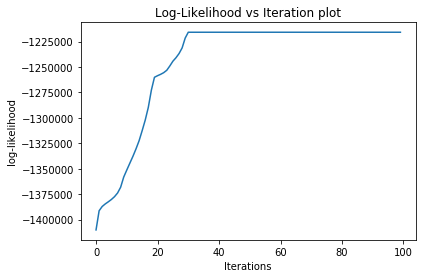

  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:15

***First Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:12 Time:  0:00:12


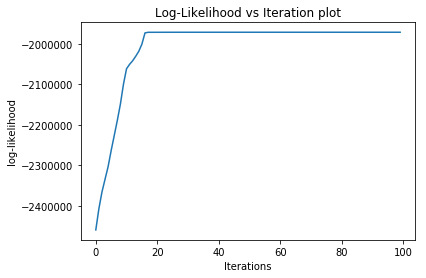

  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:12

***Second Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:13 Time:  0:00:13


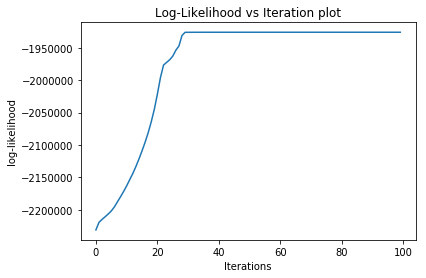

***Third Cluster Done***
***Loading Done***
Confusion Matrix
[[  3.  46.]
 [  1.  48.]]
Accuracy:  [ 0.52040816  0.52040816]
Precision:  [ 0.75       0.5106383]
Recall:  [ 0.06122449  0.97959184]
F-Measure:  [ 0.11320755  0.67132867]
Mean F-Measure:  0.39226810925
Mean F-Measure:  0.39226810925
Confusion Matrix
[[  1.00000000e-10   4.90000000e+01]
 [  1.00000000e-10   4.90000000e+01]]
Accuracy:  [ 0.5  0.5]
Precision:  [ 0.5  0.5]
Recall:  [  2.04081633e-12   1.00000000e+00]
F-Measure:  [  4.08163265e-12   6.66666667e-01]
Mean F-Measure:  0.333333333335
Mean F-Measure:  0.333333333335
Confusion Matrix
[[ 48.   1.]
 [ 38.  11.]]
Accuracy:  [ 0.60204082  0.60204082]
Precision:  [ 0.55813953  0.91666667]
Recall:  [ 0.97959184  0.2244898 ]
F-Measure:  [ 0.71111111  0.36065574]
Mean F-Measure:  0.535883424408
Mean F-Measure:  0.535883424408


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

[[  2.70000000e+01   2.30000000e+01   1.00000000e-10]
 [  7.00000000e+00   4.00000000e+01   2.00000000e+00]
 [  1.30000000e+01   2.70000000e+01   9.00000000e+00]]
Accuracy:  [ 0.70945946  0.60135135  0.71621622]
Precision:  [ 0.57446809  0.44444444  0.81818182]
Recall:  [ 0.54        0.81632653  0.18367347]
F-Measure:  [ 0.55670103  0.57553957  0.3       ]
2  completed


100% (50 of 50) |########################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (4 of 4) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

1**done


100% (50 of 50) |########################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (4 of 4) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

2**done


100% (50 of 50) |########################| Elapsed Time: 0:00:08 Time:  0:00:08
100% (4 of 4) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:14

3**done
4 (12571, 24)
4 (27350, 24)
4 (7666, 24)
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:13 Time:  0:00:13


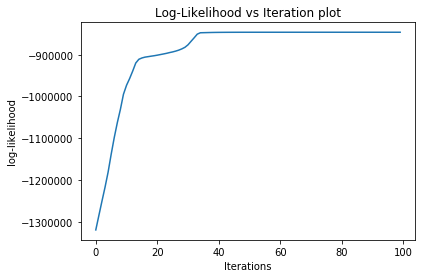

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

***First Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:23 Time:  0:00:23


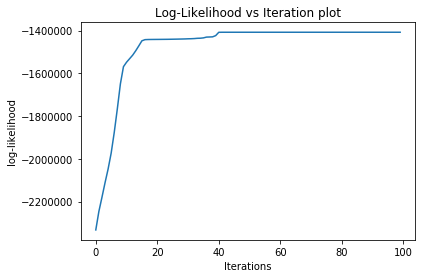

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

***Second Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:23 Time:  0:00:23


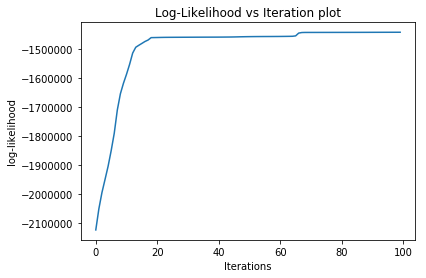

***Third Cluster Done***
***Loading Done***
Confusion Matrix
[[  8.  41.]
 [  3.  46.]]
Accuracy:  [ 0.55102041  0.55102041]
Precision:  [ 0.72727273  0.52873563]
Recall:  [ 0.16326531  0.93877551]
F-Measure:  [ 0.26666667  0.67647059]
Mean F-Measure:  0.471568627451
Mean F-Measure:  0.471568627451
Confusion Matrix
[[  1.00000000e-10   4.90000000e+01]
 [  1.00000000e-10   4.90000000e+01]]
Accuracy:  [ 0.5  0.5]
Precision:  [ 0.5  0.5]
Recall:  [  2.04081633e-12   1.00000000e+00]
F-Measure:  [  4.08163265e-12   6.66666667e-01]
Mean F-Measure:  0.333333333335
Mean F-Measure:  0.333333333335
Confusion Matrix
[[ 48.   1.]
 [ 44.   5.]]
Accuracy:  [ 0.54081633  0.54081633]
Precision:  [ 0.52173913  0.83333333]
Recall:  [ 0.97959184  0.10204082]
F-Measure:  [ 0.68085106  0.18181818]
Mean F-Measure:  0.431334622825
Mean F-Measure:  0.431334622825


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

[[ 22.  24.   4.]
 [  3.  40.   6.]
 [ 17.  27.   5.]]
Accuracy:  [ 0.67567568  0.59459459  0.63513514]
Precision:  [ 0.52380952  0.43956044  0.33333333]
Recall:  [ 0.44        0.81632653  0.10204082]
F-Measure:  [ 0.47826087  0.57142857  0.15625   ]
4  completed


100% (50 of 50) |########################| Elapsed Time: 0:00:08 Time:  0:00:08
100% (8 of 8) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

1**done


100% (50 of 50) |########################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (8 of 8) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

2**done


100% (50 of 50) |########################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (8 of 8) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

3**done
8 (2690, 24)
8 (18581, 24)
8 (6007, 24)
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:24 Time:  0:00:24


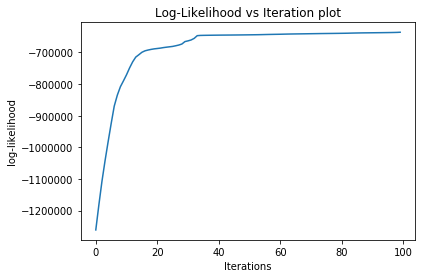

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

***First Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:42 Time:  0:00:42


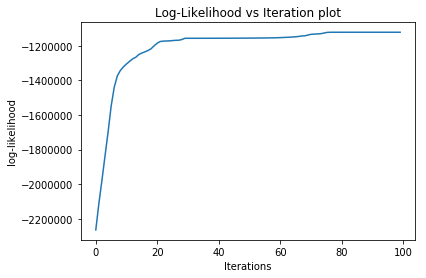

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

***Second Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:39 Time:  0:00:39


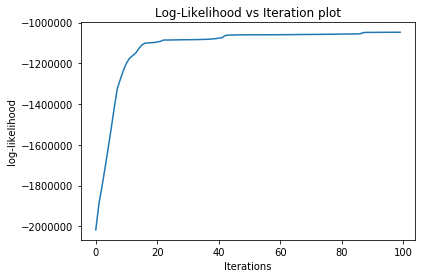

***Third Cluster Done***
***Loading Done***
Confusion Matrix
[[  1.00000000e-10   4.90000000e+01]
 [  1.00000000e-10   4.90000000e+01]]
Accuracy:  [ 0.5  0.5]
Precision:  [ 0.5  0.5]
Recall:  [  2.04081633e-12   1.00000000e+00]
F-Measure:  [  4.08163265e-12   6.66666667e-01]
Mean F-Measure:  0.333333333335
Mean F-Measure:  0.333333333335
Confusion Matrix
[[  1.00000000e-10   4.90000000e+01]
 [  1.00000000e-10   4.90000000e+01]]
Accuracy:  [ 0.5  0.5]
Precision:  [ 0.5  0.5]
Recall:  [  2.04081633e-12   1.00000000e+00]
F-Measure:  [  4.08163265e-12   6.66666667e-01]
Mean F-Measure:  0.333333333335
Mean F-Measure:  0.333333333335
Confusion Matrix
[[  4.90000000e+01   1.00000000e-10]
 [  3.80000000e+01   1.10000000e+01]]
Accuracy:  [ 0.6122449  0.6122449]
Precision:  [ 0.56321839  1.        ]
Recall:  [ 1.         0.2244898]
F-Measure:  [ 0.72058824  0.36666667]
Mean F-Measure:  0.543627450981
Mean F-Measure:  0.543627450981


N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

[[  2.10000000e+01   2.80000000e+01   1.00000000e+00]
 [  4.00000000e+00   4.50000000e+01   1.00000000e-10]
 [  1.50000000e+01   3.10000000e+01   3.00000000e+00]]
Accuracy:  [ 0.67567568  0.57432432  0.68243243]
Precision:  [ 0.525       0.43269231  0.75      ]
Recall:  [ 0.42        0.91836735  0.06122449]
F-Measure:  [ 0.46666667  0.58823529  0.11320755]
8  completed


100% (50 of 50) |########################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (16 of 16) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

1**done


100% (50 of 50) |########################| Elapsed Time: 0:00:24 Time:  0:00:24
100% (16 of 16) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

2**done


100% (50 of 50) |########################| Elapsed Time: 0:00:22 Time:  0:00:22
100% (16 of 16) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

3**done
16 (3306, 24)
16 (3335, 24)
16 (2119, 24)
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:00:48 Time:  0:00:48


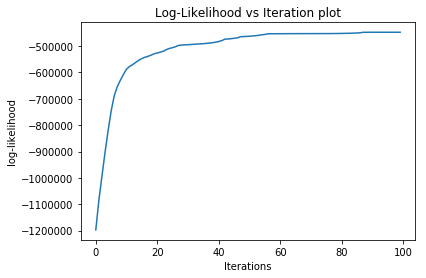

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

***First Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:01:25 Time:  0:01:25


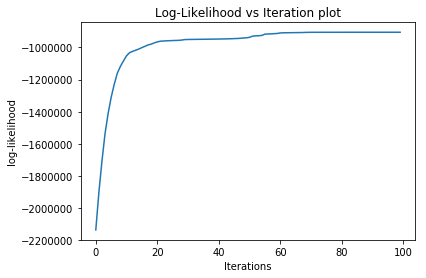

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

***Second Cluster Done***
Initialization Done


100% (100 of 100) |######################| Elapsed Time: 0:01:19 Time:  0:01:19


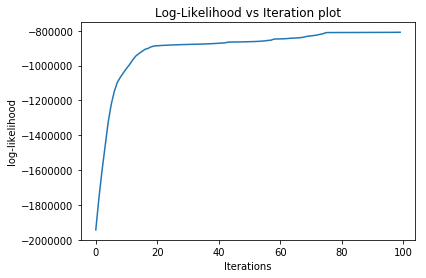

***Third Cluster Done***
***Loading Done***
Confusion Matrix
[[ 10.  39.]
 [  3.  46.]]
Accuracy:  [ 0.57142857  0.57142857]
Precision:  [ 0.76923077  0.54117647]
Recall:  [ 0.20408163  0.93877551]
F-Measure:  [ 0.32258065  0.68656716]
Mean F-Measure:  0.50457390467
Mean F-Measure:  0.50457390467
Confusion Matrix
[[  1.00000000e-10   4.90000000e+01]
 [  1.00000000e-10   4.90000000e+01]]
Accuracy:  [ 0.5  0.5]
Precision:  [ 0.5  0.5]
Recall:  [  2.04081633e-12   1.00000000e+00]
F-Measure:  [  4.08163265e-12   6.66666667e-01]
Mean F-Measure:  0.333333333335
Mean F-Measure:  0.333333333335
Confusion Matrix
[[ 47.   2.]
 [ 33.  16.]]
Accuracy:  [ 0.64285714  0.64285714]
Precision:  [ 0.5875      0.88888889]
Recall:  [ 0.95918367  0.32653061]
F-Measure:  [ 0.72868217  0.47761194]
Mean F-Measure:  0.60314705542
Mean F-Measure:  0.60314705542
[[  3.50000000e+01   1.50000000e+01   1.00000000e-10]
 [  1.30000000e+01   3.40000000e+01   2.00000000e+00]
 [  2.90000000e+01   1.60000000e+01   4.0000

In [171]:
def main():
    train1, train2, train3, test1, test2, test3 = load_data()
    print(train1.shape)
    K = [2,4,8,16]
    dims = 24
    for k in K:
        mean, cluster1 = kmeans(train1, k, dims)
        np.save('kmeans_mean1_k_{}.npy'.format(k),mean)
        print('1**done')
        mean, cluster2 = kmeans(train2, k, dims)
        np.save('kmeans_mean2_k_{}.npy'.format(k),mean)
        print('2**done')
        mean, cluster3 = kmeans(train3, k, dims)
        np.save('kmeans_mean3_k_{}.npy'.format(k),mean)
        print('3**done')

        print(len(cluster1), cluster1[0].shape)
        print(len(cluster2), cluster2[0].shape)
        print(len(cluster3), cluster3[0].shape)
        
        mu1, cov1, pi1, gamma = gmm(cluster1, train1, k, dims)
        np.save('kmeans_mu1_k_{}.npy'.format(k),mu1)
        np.save('kmeans_cov1_k_{}.npy'.format(k),cov1)
        np.save('kmeans_pi1_k_{}.npy'.format(k),pi1)
        print('***First Cluster Done***')
        mu2, cov2, pi2, gamma = gmm(cluster2, train2, k, dims)
        np.save('kmeans_mu2_k_{}.npy'.format(k),mu2)
        np.save('kmeans_cov2_k_{}.npy'.format(k),cov2)
        np.save('kmeans_pi2_k_{}.npy'.format(k),pi2)
        print('***Second Cluster Done***')
        mu3, cov3, pi3, gamma = gmm(cluster3, train3, k, dims)
        np.save('kmeans_mu3_k_{}.npy'.format(k),mu3)
        np.save('kmeans_cov3_k_{}.npy'.format(k),cov3)
        np.save('kmeans_pi3_k_{}.npy'.format(k),pi3)
        print('***Third Cluster Done***')
        mu1 = np.load('kmeans_mu1_k_{}.npy'.format(k))
        cov1 = np.load('kmeans_cov1_k_{}.npy'.format(k))
        pi1 = np.load('kmeans_pi1_k_{}.npy'.format(k))
        mu2 = np.load('kmeans_mu2_k_{}.npy'.format(k))
        cov2 = np.load('kmeans_cov2_k_{}.npy'.format(k))
        pi2 = np.load('kmeans_pi2_k_{}.npy'.format(k))
        mu3 = np.load('kmeans_mu3_k_{}.npy'.format(k))
        cov3 = np.load('kmeans_cov3_k_{}.npy'.format(k))
        pi3 = np.load('kmeans_pi3_k_{}.npy'.format(k))
        print('***Loading Done***')
        pair_plot(test1, test2, train1, train2, mu1, cov1, pi1, mu2, cov2, pi2, 1, 2)
        pair_plot(test1, test3, train1, train3, mu1, cov1, pi1, mu3, cov3, pi3, 1, 3)
        pair_plot(test2, test3, train2, train3, mu2, cov2, pi2, mu3, cov3, pi3, 2, 3)
        
        
        total_plot(test1, test2, test3, train1, train2, train3, mu1, cov1, pi1, mu2, cov2, 
                   pi2, mu3, cov3, pi3)
        print(k, ' completed')
if(__name__=="__main__"):    
    main()    